<a href="https://colab.research.google.com/github/IrfanArsyananda/Analisis-Data-dengan-Python/blob/main/Submission/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data : Bike Sharing Statistics
- Nama : Irfan Arsyananda
- Email : irfan.ars18@gmail.com
- Id Dicoding : irfanarsyananda

## Menentukan Pertanyaan Bisnis

- Bagaimana pola sewa sepeda setiap jam dalam sehari?
- Bagaimana pola sewa sepeda berdasarkan kondisi cuaca?
- Bagaimana hubungan jumlah rata-rata sewa harian dengan musim?
- Bagaimana pola jumlah sewa berdasarkan bulan?
- Bagaimana hubungan antara hari kerja dengan jumlah sewa?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Data Wrangling

### Gathering Data

Mengambil dataset dari link (clone) : https://github.com/IrfanArsyananda/Analisis-Data-dengan-Python/tree/main/Submission/dataset

In [2]:
# Membaca data perjam
hour_df = pd.read_csv("https://raw.githubusercontent.com/IrfanArsyananda/Analisis-Data-dengan-Python/main/Submission/dataset/Bike-sharing/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Membaca data perhari
day_df = pd.read_csv("https://raw.githubusercontent.com/IrfanArsyananda/Analisis-Data-dengan-Python/main/Submission/dataset/Bike-sharing/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Assessing hour_df

In [4]:
# Cek tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Cek jumlah missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Cek duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Cek deskripsi numerik dari data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil :
- Tipe data pada kolom 'dteday' seharusnya 'datetime'
- Tidak ada missing values
- Tidak ada duplikasi data
- Tidak ada outliner data

#### Assessing day_df

In [8]:
# Cek tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
# Cek jumlah missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Cek duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Cek deskripsi numerik dari data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil :
- Tipe data pada kolom 'dteday' seharusnya 'datetime'
- Tidak ada missing values
- Tidak ada duplikasi data
- Tidak ada outliner data

### Cleaning Data

#### Cleaning hour_df

In [12]:
# Mengubah tipe data untuk kolom 'dteday' menjadi 'datetime'
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Cleaning day_df

In [13]:
# Mengubah tipe data untuk kolom 'dteday' menjadi 'datetime'
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

Berdasarkan data yang ada :
- Data 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' masih disederhanakan menjadi notasi angka
- Data 'temp',	'atemp',	'hum',	'windspeed' masih dinormalisasi menggunakan skala

Data akan dikembalikan/denormalisasi sesuai dengan panduan 'README.txt'

Kondisi Cuaca akan disederhanakan
- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian -> Good
- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut -> Normal
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar -> Bad
- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut -> Extreme

In [14]:
# Fungsi untuk mengubah angka menjadi nama musim
def to_season(seas):
    switcher = {
        "1": "Springer",
        "2": "Summer",
        "3": "Fall",
        "4": "Winter"
    }
    return switcher.get(seas)

# Fungsi untuk mengubah angka menjadi tahun
def to_year(y):
    switcher = {
        0: 2011,
        1: 2012
    }
    return switcher.get(y)

# Fungsi untuk mengubah angka menjadi nama bulan
def to_month(numb):
    switcher = {
        "1": "January",
        "2": "February",
        "3": "March",
        "4": "April",
        "5": "May",
        "6": "June",
        "7": "July",
        "8": "August",
        "9": "September",
        "10": "October",
        "11": "November",
        "12": "December",
    }
    return switcher.get(str(numb))

# Fungsi untuk mengubah angka menjadi ya / tidak
def to_yes_no(numb):
    switcher = {
        "0": "No",
        "1": "Yes"
    }
    return switcher.get(numb)

# Fungsi untuk mengubah angka menjadi kondisi cuaca * disederhanakan berdasar readme.txt
def to_weathersit(wt):
    switcher = {
        "1": "Good",
        "2": "Normal",
        "3": "Bad",
        "4": "Extreme"
    }
    return switcher.get(wt)

### Explore hour_df

In [15]:
# Mengubah tipe data kolom numerik menjadi string
hour_df["season"] = hour_df["season"].astype(str)
hour_df["mnth"] = hour_df["mnth"].astype(str)
hour_df["holiday"] = hour_df["holiday"].astype(str)
hour_df["weekday"] = hour_df["weekday"].astype(str)
hour_df["workingday"] = hour_df["workingday"].astype(str)
hour_df["weathersit"] = hour_df["weathersit"].astype(str)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [16]:
# Mengubah kolom 'season' sesuai dengan nama musim
hour_df["season"] = hour_df["season"].apply(to_season)
# Mengubah kolom 'yr' menjadi nilai sebenarnya
hour_df["yr"] = hour_df["yr"].apply(to_year)
# Mengubah kolom 'mnth' sesuai dengan nama bulan
hour_df["mnth"] = hour_df["mnth"].apply(to_month)
# Mengubah kolom 'holiday' menjadi ya / tidak
hour_df["holiday"] = hour_df["holiday"].apply(to_yes_no)
# Mengubah kolom 'workingday' menjadi ya / tidak
hour_df["workingday"] = hour_df["workingday"].apply(to_yes_no)
# Mengubah kolom 'weathersit' menjadi kondisi cuaca
hour_df["weathersit"] = hour_df["weathersit"].apply(to_weathersit)
# Mengubah kolom 'temp', 'atemp', 'hum', 'windspeed' menjadi nilai sebenarnya
hour_df["temp"] = hour_df["temp"].apply(lambda x: x * 41)
hour_df["atemp"] = hour_df["atemp"].apply(lambda x: x * 50)
hour_df["hum"] = hour_df["hum"].apply(lambda x: x * 100)
hour_df["windspeed"] = hour_df["windspeed"].apply(lambda x: x * 67)

In [17]:
hour_df.describe()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,No,6,No,Good,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,No,6,No,Good,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,No,6,No,Good,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,No,6,No,Good,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,No,6,No,Good,9.84,14.395,75.0,0.0,0,1,1


In [18]:
# Rata-rata jumlah sewa berdasarkan jam
hour_df.groupby(by="hr").agg({
    "cnt":["mean","min", "max", "sum"]
})

cnt                 
          mean min  max     sum
hr                             
0    53.898072   2  283   39130
1    33.375691   1  168   24164
2    22.869930   1  132   16352
3    11.727403   1   79    8174
4     6.352941   1   28    4428
5    19.889819   1   66   14261
6    76.044138   1  213   55132
7   212.064649   1  596  154171
8   359.011004   5  839  261001
9   219.309491  14  426  159438
10  173.668501   8  539  126257
11  208.143054  10  663  151320
12  253.315934   3  776  184414
13  253.661180  11  760  184919
14  240.949246  12  750  175652
15  251.233196   7  750  183149
16  311.983562  11  783  227748
17  461.452055  15  976  336860
18  425.510989  23  977  309772
19  311.523352  11  743  226789
20  226.030220  11  567  164550
21  172.314560   6  584  125445
22  131.335165   9  502   95612
23   87.831044   2  256   63941

In [19]:
# Jumlah sewa berdasarkan cuaca
hour_df.groupby(by="weathersit").agg({
    # "casual":["mean", "min", "max", "sum"],
    # "registered":["mean", "min", "max", "sum"],
    "cnt":["mean", "min", "max", "sum"],
})

cnt                  
                  mean min  max      sum
weathersit                              
Bad         111.579281   1  891   158331
Extreme      74.333333  23  164      223
Good        204.869272   1  977  2338173
Normal      175.165493   1  957   795952

Hasil :
- Suhu terendah adalah 0.8℃ dan tertinggi 41℃
- Terjadi lonjakan sewa mulai pukul 7 dan mengalami penurunan pukul 17 keatas
- Rata-rata orang lebih banyak menyewa pada saat cuaca bagus, dan paling sedikit saat cuaca ekstrim

### Explore day_df

In [20]:
# Mengubah tipe data kolom numerik menjadi string
day_df["season"] = day_df["season"].astype(str)
# day_df["mnth"] = day_df["mnth"].astype(str)
day_df["holiday"] = day_df["holiday"].astype(str)
day_df["weekday"] = day_df["weekday"].astype(str)
day_df["workingday"] = day_df["workingday"].astype(str)
day_df["weathersit"] = day_df["weathersit"].astype(str)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [21]:
# Mengubah kolom 'season' sesuai dengan nama musim
day_df["season"] = day_df["season"].apply(to_season)
# Mengubah kolom 'yr' menjadi nilai sebenarnya
day_df["yr"] = day_df["yr"].apply(to_year)
# Membuat kolom 'month' sesuai dengan nama bulan
day_df["month"] = day_df["mnth"].apply(to_month)
# Mengubah kolom 'holiday' menjadi ya / tidak
day_df["holiday"] = day_df["holiday"].apply(to_yes_no)
# Mengubah kolom 'workingday' menjadi ya / tidak
day_df["workingday"] = day_df["workingday"].apply(to_yes_no)
# Mengubah kolom 'weathersit' menjadi kondisi cuaca
day_df["weathersit"] = day_df["weathersit"].apply(to_weathersit)
# Mengubah kolom 'temp', 'atemp', 'hum', 'windspeed' menjadi nilai sebenarnya
day_df["temp"] = day_df["temp"].apply(lambda x: x * 41)
day_df["atemp"] = day_df["atemp"].apply(lambda x: x * 50)
day_df["hum"] = day_df["hum"].apply(lambda x: x * 100)
day_df["windspeed"] = day_df["windspeed"].apply(lambda x: x * 67)

In [22]:
# day_df.describe()
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,2011-01-01,Springer,2011,1,No,6,No,Normal,14.110847,18.18125,80.5833,10.749882,331,654,985,January
1,2,2011-01-02,Springer,2011,1,No,0,No,Normal,14.902598,17.68695,69.6087,16.652113,131,670,801,January
2,3,2011-01-03,Springer,2011,1,No,1,Yes,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349,January
3,4,2011-01-04,Springer,2011,1,No,2,Yes,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562,January
4,5,2011-01-05,Springer,2011,1,No,3,Yes,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600,January


In [23]:
# Rata-rata jumlah sewa berdasarkan musim
day_df.groupby(by="season").agg({
    "cnt":["mean"]
})

,cnt
,mean
season,
Fall,5644.303191
Springer,2604.132597
Summer,4992.331522
Winter,4728.162921


In [24]:
# Jumlah sewa berdasarkan bulan
day_df.groupby(by="mnth").agg({
    # "casual":["mean", "min", "max", "sum"],
    # "registered":["mean", "min", "max", "sum"],
    "cnt":["sum"]
})

,cnt
,sum
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194


In [25]:
# Jumlah sewa berdasarkan hari kerja
day_df.groupby(by="workingday").agg({
    # "casual":["mean", "min", "max", "sum"],
    # "registered":["mean", "min", "max", "sum"],
    "cnt":["sum"]
})

,cnt
,sum
workingday,
No,1000269
Yes,2292410


Hasil :
- Jumlah sewa rata-rata terbanyak pada musim gugur, musim panas, musim salju, dan paling sedikit musim semi
- Jumlah sewa terbanyak ada pada bulan Agustus, dan paling sedikit pada bulan Januari
- Jumlah sewa pada hari kerja lebih banyak daripada bukan hari kerja

## Visualization & Explanatory Analysis

In [26]:
# Membuat fungsi untuk generate warna
def make_color(n):
  color = []
  for i in range(n):
    r = lambda: random.randint(0,255)
    ranhex= '#%02X%02X%02X' % (r(),r(),r())
    color.append(ranhex)
  return color

### Pertanyaan 1: Bagaimana pola sewa sepeda setiap jam dalam sehari?

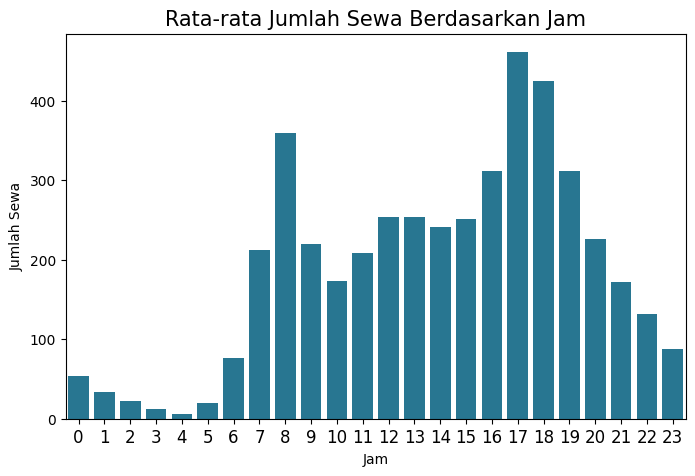

In [27]:
# Rata-rata jumlah sewa berdasarkan jam
byhr = hour_df.groupby(by="hr").cnt.mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    y="cnt",
    x="hr",
    data=byhr.sort_values(by="hr", ascending=True),
    palette=make_color(1)
)
plt.title("Rata-rata Jumlah Sewa Berdasarkan Jam", loc="center", fontsize=15)
plt.ylabel("Jumlah Sewa")
plt.xlabel("Jam")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana pola sewa sepeda berdasarkan kondisi cuaca?

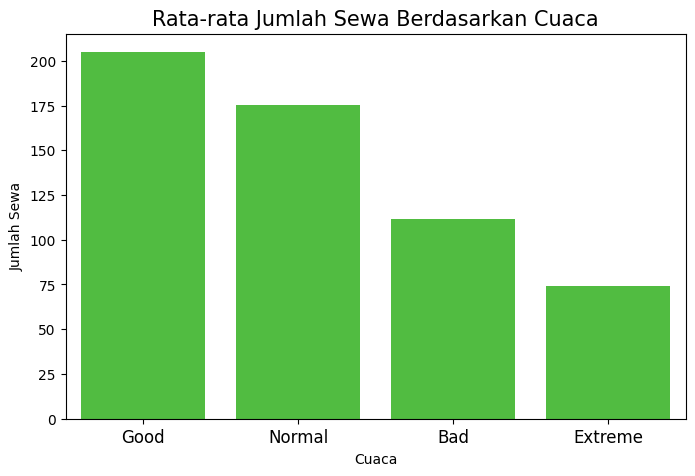

In [28]:
# Jumlah sewa berdasarkan cuaca
byweather_df = hour_df.groupby(by="weathersit").cnt.mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    y="cnt",
    x="weathersit",
    data=byweather_df.sort_values(by="cnt", ascending=False),
    palette=make_color(1)
)
plt.title("Rata-rata Jumlah Sewa Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel("Jumlah Sewa")
plt.xlabel("Cuaca")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana hubungan jumlah rata-rata sewa harian dengan musim?

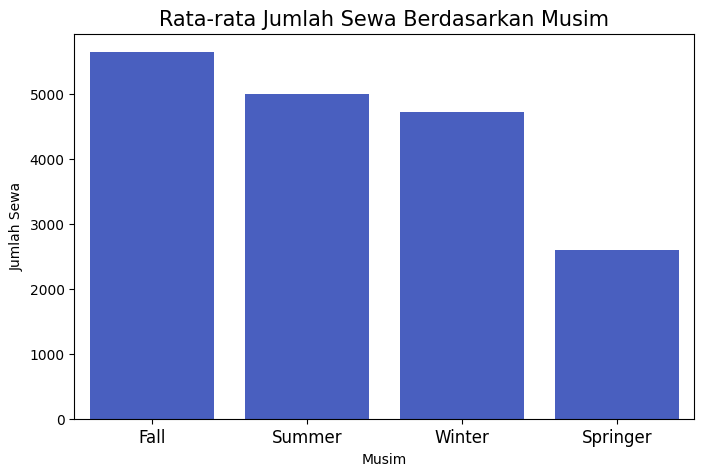

In [29]:
# Rata-rata jumlah sewa berdasarkan musim
byseason_df = day_df.groupby(by="season").cnt.mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    y="cnt",
    x="season",
    data=byseason_df.sort_values(by="cnt", ascending=False),
    palette=make_color(1)
)
plt.title("Rata-rata Jumlah Sewa Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("Jumlah Sewa")
plt.xlabel("Musim")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana pola jumlah sewa berdasarkan bulan?

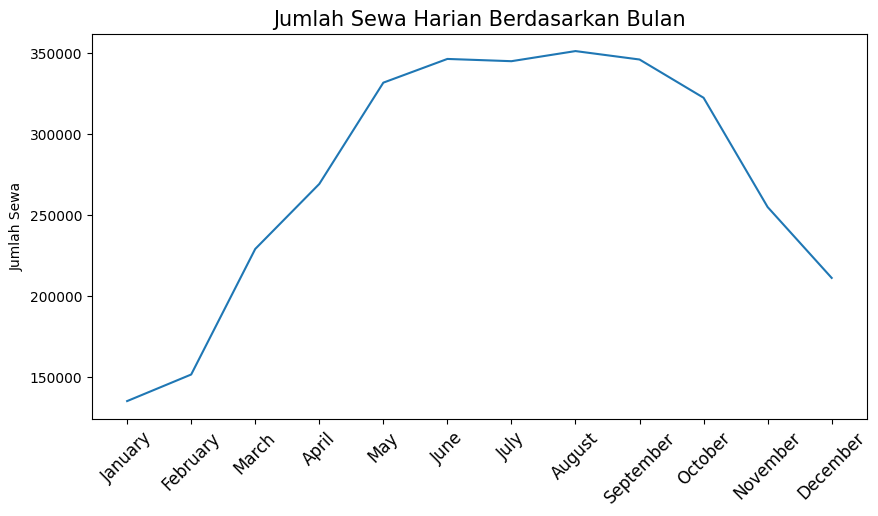

In [30]:
# Jumlah sewa berdasarkan bulan
bymonth_df = day_df.groupby(by="mnth").cnt.sum().reset_index()
month_name_df = day_df["month"].unique()

plt.figure(figsize=(10, 5))
sns.lineplot(
    y="cnt",
    x=month_name_df,
    data=bymonth_df,
    # palette=make_color(1)
)
plt.title("Jumlah Sewa Harian Berdasarkan Bulan", loc="center", fontsize=15)
plt.ylabel("Jumlah Sewa")
plt.xlabel(None)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 5: Bagaimana hubungan antara hari kerja dengan jumlah sewa harian?

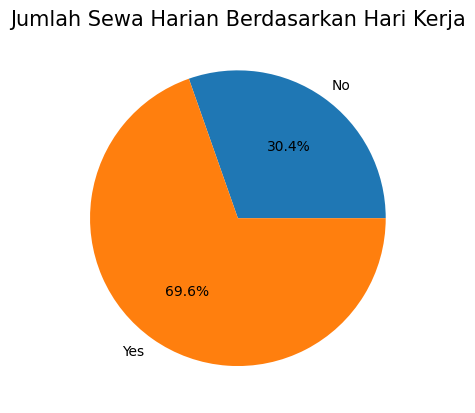

In [31]:
# Jumlah sewa berdasarkan hari kerja
byworkingday_df = day_df.groupby(by="workingday").cnt.sum().reset_index()
byworkingday_df.rename(columns={
    "cnt": "jumlah"
}, inplace=True)
print()

flavors = byworkingday_df['workingday'].to_list()
votes = byworkingday_df['jumlah'].to_list()
plt.pie(
    x=votes,
    labels=flavors,
    autopct='%1.1f%%',
)
plt.title("Jumlah Sewa Harian Berdasarkan Hari Kerja", loc="center", fontsize=15)
plt.show()

## Conclusion

- Conclusion Pertanyaan 1: Jumlah sewa meningkat pada pukul 8 pagi, dan pukul 5 sore
- Conclusion Pertanyaan 2: Jumlah sewa sepeda berbanding lurus dengan kondisi cuaca, semakin buruk cuaca maka semakin sedikit jumlah penyewa
- Conclusion Pertanyaan 3: Rata-rata jumlah sewa tertinggi pada Musim Gugur, diikuti Musim Panas, Salju, dan terendah Musim Semi
- Conclusion Pertanyaan 4: Jumlah sewa naik dari Bulan Januari sampai dengan puncak Bulan Agustus, lalu turun sampai Bulan Desember
- Conclusion Pertanyaan 5: Pada hari kerja, jumlah sewa sepeda lebih banyak daripada saat bukan hari kerja.